#  lab 11

***Regression Analysis***

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission

1 Import needed libraries

2 read data from file

3 list dataset showing first 5 lines. View data types

4 verify possible values of categoric variable Ft

5 convert Petrol to PETROL and Diesel to DIESEL

6 verify again values of categoric variable Ft

7 convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

8 remove all lines with NaN from df dataset and set to XY

9 create a Y vector and X matrix

10 create a regression model

11 analyse correlation between variables. Use seaborn. Like for example in:

    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

12 convert Ft into dummy variables

13 add dummy variable to a new data set XY2

14 create a Y vector and X matrix

15 create a regression model


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("CO2_passenger_cars2018b.csv")

In [8]:
df.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375,104.0,DIESEL,1598,85.0
1,VOLKSWAGEN,GOLF,1340,119.0,PETROL,1498,110.0
2,VOLKSWAGEN,GOLF,1320,120.0,PETROL,1498,110.0
3,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
4,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0


In [10]:
df.dtypes

Fabricante         object
CommercialName     object
m (kg)             object
Enedc (g/km)      float64
Ft                 object
ec (cm3)           object
ep (KW)           float64
dtype: object

In [16]:
colunas = list (df)
for i in colunas:
    if i == 'Ft':
        print (i,df[i].unique())
        print ('Existem: '+ str(len (df[i].unique())) + 'tipos')

Ft ['DIESEL' 'PETROL' nan 'Petrol' 'Diesel']
Existem: 5tipos


In [17]:
df['Ft'] = df['Ft'].replace(to_replace = 'Petrol', value='PETROL')
df['Ft'] = df['Ft'].replace(to_replace = 'Diesel', value='DIESEL')

In [20]:
df['Ft'].unique()

array(['DIESEL', 'PETROL', nan], dtype=object)

In [21]:
df.loc[:, 'm (kg)']=pd.to_numeric(df.loc[:,'m (kg)'],errors='Coerce')

In [23]:
df.loc[:, 'ec (cm3)']=pd.to_numeric(df.loc[:,'ec (cm3)'],errors='Coerce')

In [24]:
df.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,DIESEL,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,PETROL,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,PETROL,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,PETROL,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,PETROL,999.0,70.0


In [25]:
df = df.dropna()

In [26]:
df.shape

(936948, 7)

In [28]:
X=df.drop(['Fabricante', 'CommercialName', 'Enedc (g/km)', 'Ft'], axis=1)
Y=df.loc [:, 'Enedc (g/km)']
X.head()

,m (kg),ec (cm3),ep (KW)
0,1375.0,1598.0,85.0
1,1340.0,1498.0,110.0
2,1320.0,1498.0,110.0
3,1145.0,999.0,70.0
4,1145.0,999.0,70.0


In [33]:
import statsmodels.api as sm
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\famil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Enedc (g/km)   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 3.055e+05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:13:10   Log-Likelihood:            -3.9109e+06
No. Observations:              936948   AIC:                         7.822e+06
Df Residuals:                  936944   BIC:                         7.822e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3050      0.090    700.122      0.000      63.128      63.482
m (kg)         0.0241      0.000    232.309      0.000       0.024       0.024
ec (cm3)      -0.0017   7.11e-05    -23.931      0.000      -0.002      -0.002
ep (KW)        0.3118      0.001    393.372      0.000       0.310       0.313
==============================================================================
Omnibus:                   204532.748   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           871625.317
Skew:                           1.021   Prob(JB):                         0.00
Kurtosis:                       7.261   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

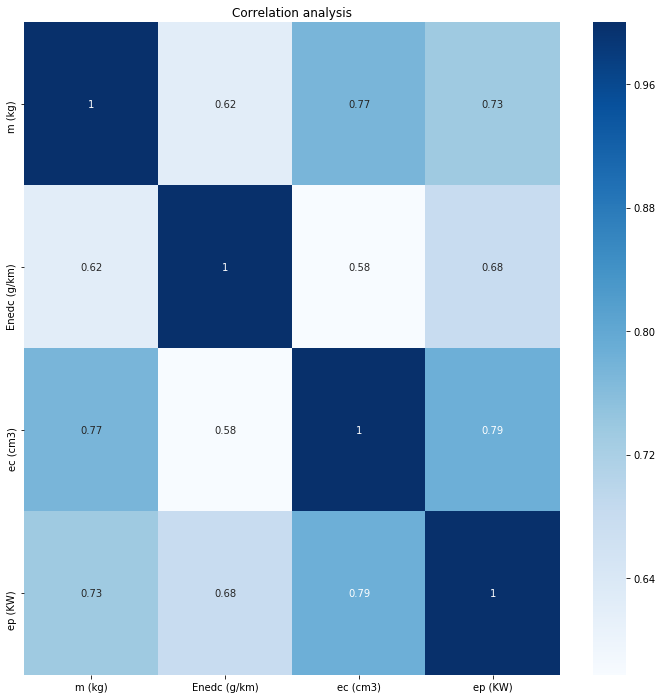

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = df.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()